In [2]:
import numpy as np
import matplotlib.pyplot as plt

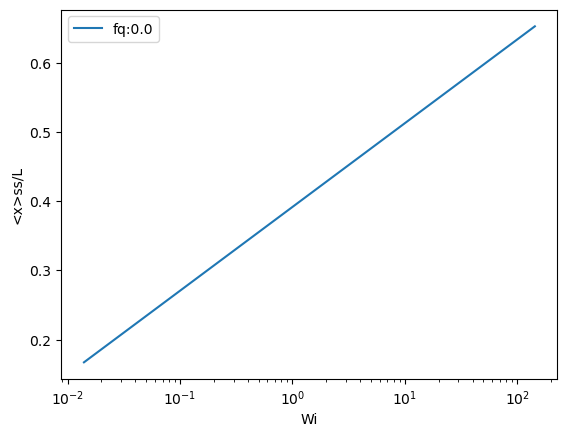

In [76]:
"""
Average Extension Across Chains
"""
"""
User Inputs
"""
Nb = 50
Nc = 10
conc = 0.5
box_length = 42.263516
#box_length = 26.624347
#Ncharges = np.array([1,50,125])
Ncharges = np.array([0])
barrier = 3
barrier2 = 3
lambda_d = 10
edot = np.array([0.00008,0.81967])
#edot = np.array([0.00008])
ntr = 15
it = 1
tmax = 100000000
printprops = 1000
##################################
nsamp = int(tmax/printprops)
real_time = []

ext_edot = np.zeros(len(edot))

for n in range(len(Ncharges)):
    for e in range(len(edot)):
        allEXT = np.array(ntr*[np.array((nsamp+1)*[0.0])])
        for tr in range(1,ntr+1):

            file_name = "prop/E" + str(Nb)+ "_" + str(Nc) + "_" + format(conc,'.6f') + "_" +format(box_length,'.6f') + "_"+ str(Ncharges[n]) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot[e],'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
            #print(file_name)

            """
            Extracting data
            """     
            my_data = np.loadtxt(file_name)
            t_start = 0 #time to average extension in tau - 1
            time = my_data[0:,0] 
            ext_data = my_data[0:,2] 

            #print(ext)

            """
            Average Through Chains
            """    
            ext = [0]
            ext_t = []
            t = []
            tcount = 0
            for i in range(0,len(ext_data)):
                if(i%Nc==0):
                    t.append(tcount)
                    ext_t.append(np.average(ext))
                    tcount+=1
                    ext = []
                ext.append(ext_data[i])

            extavg_t = np.zeros(tcount)
            
            allEXT[tr-1] = ext_t
            
            
        """
        Average Through Trajectories
        """ 
        EXT = []
        STD = []
        for k in range(0,nsamp):
            x = []
            for j in range(0,ntr):
                x.append(allEXT[j][k])
            #print(np.mean(x))
            EXT.append(np.mean(x))
            STD.append(np.std(x))
        

        """
        Check for Steady-State
        """  
#         t = np.linspace(1,tcount-1,num=tcount-1)
#         plt.plot(t,EXT)


        """
        Average Through Time for each flowrate
        """ 
        t_ss = 40000
        ext_edot[e] = np.mean(EXT[t_ss:])
        #print(ext_edot[e])

    """
    Plot Data
    """    
    plt.semilogx(edot*175,ext_edot,label='fq:'+str(Ncharges[n]/(Nb*Nc)))
    plt.xlabel("Wi")
    plt.ylabel("<x>ss/L")
    plt.legend()

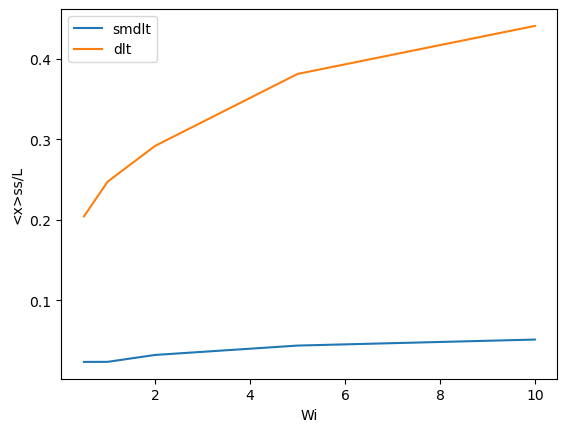

In [48]:
ext_dlt_HI = np.array([0.17557222, 0.18152285, 0.20986852, 0.2575577,  0.30391771])
ext_dlt_FD = np.array([0.20431421, 0.24745556, 0.29189129, 0.38121213, 0.4408423 ])

"""
Plot Data
"""    
plt.plot(edot*175,ext_edot,label='smdlt')
plt.plot(edot*175,ext_dlt_FD,label='dlt')
plt.xlabel("Wi")
plt.ylabel("<x>ss/L")
plt.legend()

prop/E50_10_0.500000_42.263516_0_3.00_3.00_10.00_1.63934_4_1.txt


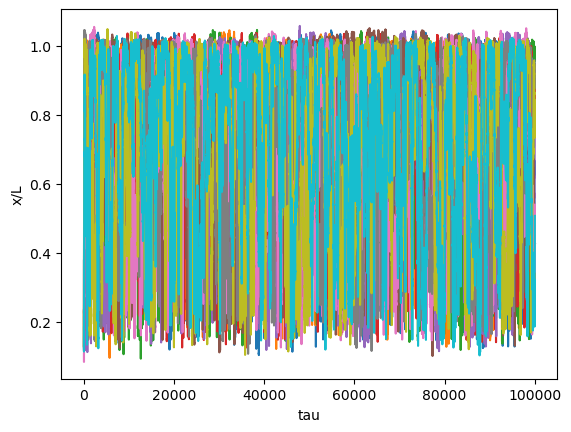

In [9]:
"""
Extension Across Chains (Not Averaged)
"""
"""
User Inputs
"""
Nb = 50
Nc = 10
conc = 0.5
box_length = 42.263516
Ncharges = 0
barrier = 3
barrier2 = 3
lambda_d = 10
edot = 1.63934
tr = 4
it = 1
tmax = 100000000
printprops = 1000
##################################
nsamp = int(tmax/printprops)
extavg = np.array(Nc*[np.array((nsamp+1)*[0.0])])
real_time = []

# for i in range(0,len(Ncharges)): 
#     for d in range(0,len(conc)):

file_name = "prop/E" + str(Nb)+ "_" + str(Nc) + "_" + format(conc,'.6f') + "_" +format(box_length,'.6f') + "_"+ str(Ncharges) + "_" + format(barrier,'.2f') + "_" + format(barrier2,'.2f')+"_"+ format(lambda_d,'.2f')+"_"+ format(edot,'.5f')+"_"+str(tr)+"_" +str(it)+".txt"
print(file_name)

"""
Extracting data
"""     
my_data = np.loadtxt(file_name)
t_start = 0 #time to average extension in tau - 1
time = my_data[0:,0] 
ext_data = my_data[0:,2] 

for i in range(0,Nc):
    for j in range(0,nsamp):
        extavg[i][j] = ext_data[i+j*Nc]
        #print(i+j*Nc)
    
#print(extavg[0])

"""
Plot Data
"""    
for i in range(0,nsamp):
    real_time.append(i) 
    #print(ext_t[i])
real_time.append(i+1) 

# print(real_time)
# print(ext_t)
for i in range(0,Nc):
    plt.plot(real_time[0:nsamp-1],extavg[i][0:nsamp-1])
    plt.xlabel("tau")
    plt.ylabel("x/L")

In [55]:
t[-1]

100000

In [75]:
nsamp

100

In [66]:
t = np.linspace(1,tcount,num=tcount)

In [67]:
t

array([1.00000e+00, 2.00000e+00, 3.00000e+00, ..., 9.99990e+04,
       1.00000e+05, 1.00001e+05])